In [1]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import math
from collections import Counter
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.feature_selection import RFE
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
filepath = r"d:\User\Desktop\GT\jupyter\Diabetes\diabetes.csv"

df = pd.read_csv(filepath)

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df['Outcome'].value_counts() 

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df['Outcome'].value_counts()/float(len(df)) # Viewing percentage distribution of outcomes

Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64

In [8]:
df.info() # Summary of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
round(df.describe(),2) # Checking to see if there are outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [11]:
round(df.describe(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


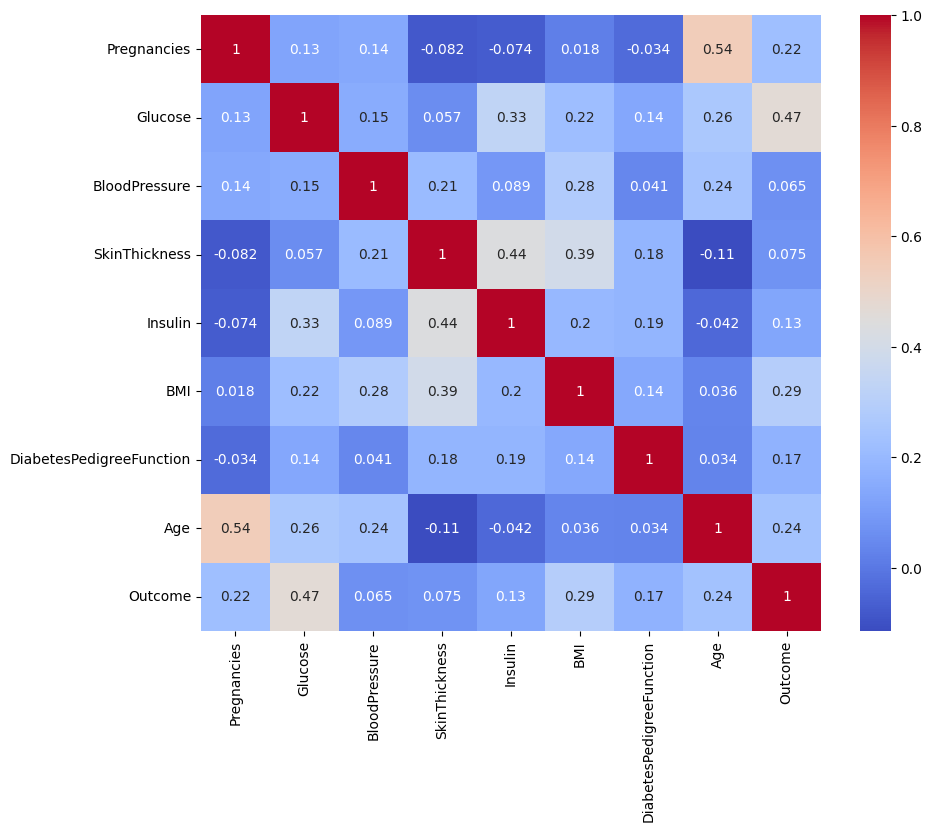

In [12]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [13]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
X = df.drop(columns='Outcome')
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [16]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89,62,0,0,22.5,0.142,33
127,1,118,58,36,94,33.3,0.261,23
564,0,91,80,0,0,32.4,0.601,27
375,12,140,82,43,325,39.2,0.528,58
663,9,145,80,46,130,37.9,0.637,40
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

**Scratch**

In [18]:
def logisregress(x,y,w,b,lr,iterations):
    m,n=x.shape
    cost=[]
    for i in range(iterations):
        z=np.dot(x,w)+b
        fx = 1/(1 + np.exp(-z))
        loss = -np.mean(y*np.log(fx) + (1-y)*np.log(1-fx))
        dw = np.dot(x.T,(fx-y))/m
        db = np.mean(fx-y)
        w = w - lr*dw
        b = b - lr*db
        cos = cost_calc(x,y,w,b,fx)
        cost.append(cos)
    fx = (fx>=0.5).astype(int)
    return w,b,cost,fx

In [19]:
def cost_calc(x,y,w,b,fx):
    cost = -np.mean(y*np.log(fx) + (1-y)*np.log(1-fx))
    return cost

Weight calculated: [ 0.27241486  0.96788409 -0.17302799  0.07514828 -0.06884267  0.6482723
  0.27925398  0.27533744]
Bias calculated: -0.7718968821152647


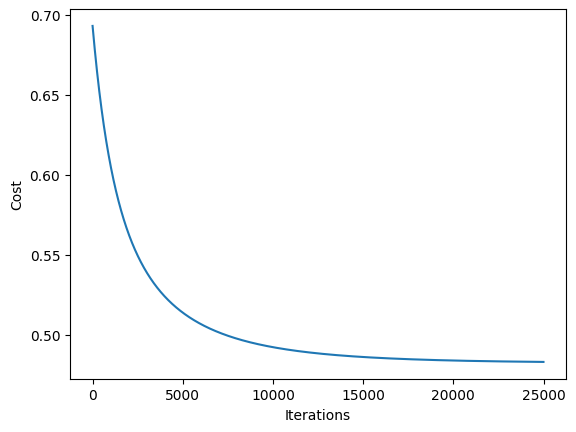

Accuracy: 0.8125
Precision: 0.7954545454545454
Recall: 0.5645161290322581
F1 Score: 0.660377358490566
Confusion Matrix: 
 [[121   9]
 [ 27  35]]


In [20]:
def main():
    lr = 0.001
    iterations = 25000
    
    w = np.zeros(X_train.shape[1])
    b = 0

    w, b, cost, train_preds = logisregress(X_train, y_train, w, b, lr, iterations)

    print(f"Weight calculated: {w}")
    print(f"Bias calculated: {b}")
    
    plt.plot(range(iterations),cost)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

    z_test = np.dot(X_test, w) + b
    fx_test = 1 / (1 + np.exp(-z_test))
    y_pred_test = (fx_test >= 0.55).astype(int)

    print("Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Precision:", precision_score(y_test, y_pred_test))
    print("Recall:", recall_score(y_test, y_pred_test))
    print("F1 Score:", f1_score(y_test, y_pred_test))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test))
    
main()

**Scikit Learn**

In [21]:
def calcu1(i):
    model = LogisticRegression(max_iter=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'max_iter': i,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'y_pred': y_pred 
    })

In [22]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
results = []

iter_values = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,60,70,80,90,100,
               150,200,250,300,350,400,500,600,700,800,900,1000]

for j in iter_values:
    calcu1(j)

best_result = max(results, key=lambda x: x['accuracy'])

print(f"Best result at max_iter = {best_result['max_iter']}")
print("Accuracy:", best_result['accuracy'])
print("Precision:", best_result['precision'])
print("Recall:", best_result['recall'])
print("F1 Score:", best_result['f1_score'])
print("Confusion Matrix:\n", confusion_matrix(y_test, best_result['y_pred']))


Best result at max_iter = 3
Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226
F1 Score: 0.6545454545454545
Confusion Matrix:
 [[118  12]
 [ 26  36]]


**Logistic Regression Visualization**

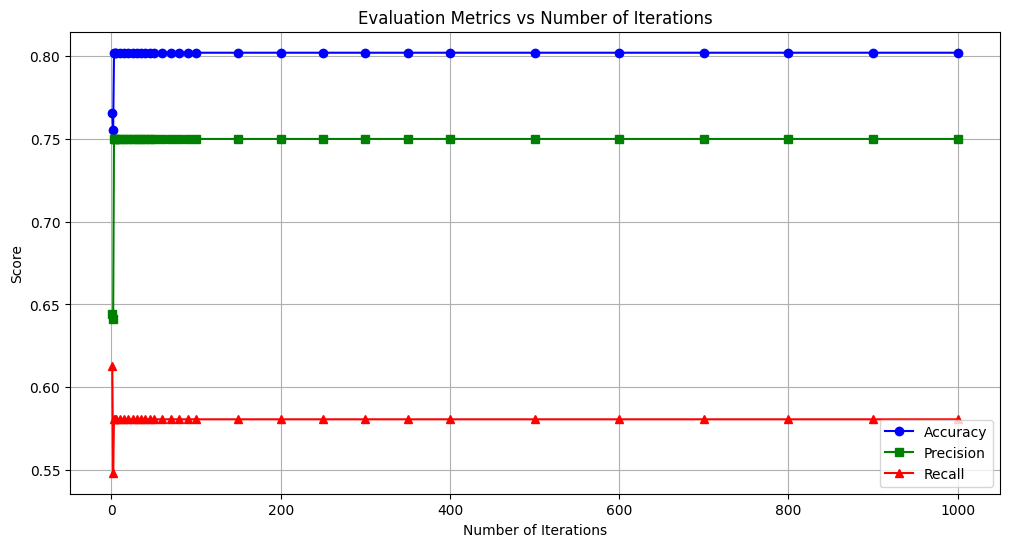

In [23]:
iterations = [r['max_iter'] for r in results]
accuracies = [r['accuracy'] for r in results]
precisions = [r['precision'] for r in results]
recalls = [r['recall'] for r in results]

plt.figure(figsize=(12, 6))
plt.plot(iterations, accuracies, marker='o', label='Accuracy', color='b')
plt.plot(iterations, precisions, marker='s', label='Precision', color='g')
plt.plot(iterations, recalls, marker='^', label='Recall', color='r')
plt.title('Evaluation Metrics vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Decision trees

**Scratch**

In [24]:
def entropy(y):
    counts = Counter(y)
    total = len(y)
    ent = 0
    for label in counts:
        p = counts[label] / total
        ent -= p * math.log2(p)
    return ent

def information_gain(parent_y, left_y, right_y):
    p = len(left_y) / len(parent_y)
    return entropy(parent_y) - (p * entropy(left_y) + (1 - p) * entropy(right_y))

In [25]:
def best_split(X, y):
    best_gain = -float('inf')
    best_feature = None
    best_threshold = None

    n_features = len(X[0])

    for feature_idx in range(n_features):
        values = sorted(set([x[feature_idx] for x in X]))
        if len(values) < 2:
            continue
        thresholds = [(values[i] + values[i+1]) / 2 for i in range(len(values) - 1)]

        for t in thresholds:
            left_y = [y[i] for i in range(len(X)) if X[i][feature_idx] <= t]
            right_y = [y[i] for i in range(len(X)) if X[i][feature_idx] > t]

            if not left_y or not right_y:
                continue

            gain = information_gain(y, left_y, right_y)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_idx
                best_threshold = t

    return best_feature, best_threshold


In [26]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature          
        self.threshold = threshold      
        self.left = left                
        self.right = right              
        self.value = value              

    def is_leaf(self):
        return self.value is not None

In [27]:
def build_tree(X, y, depth=0, max_depth=5):
    if len(set(y)) == 1:
        return Node(value=y[0])

    if depth >= max_depth or len(X) == 0:
        majority = Counter(y).most_common(1)[0][0]
        return Node(value=majority)

    best_feature, threshold = best_split(X, y)
    if threshold is None or best_feature is None:
        majority = Counter(y).most_common(1)[0][0]
        return Node(value=majority)

    left_idx = [i for i in range(len(X)) if X[i][best_feature] <= threshold]
    right_idx = [i for i in range(len(X)) if X[i][best_feature] > threshold]

    left_X = [X[i] for i in left_idx]
    right_X = [X[i] for i in right_idx]
    left_y = [y[i] for i in left_idx]
    right_y = [y[i] for i in right_idx]

    left_node = build_tree(left_X, left_y, depth + 1, max_depth)
    right_node = build_tree(right_X, right_y, depth + 1, max_depth)

    return Node(feature=best_feature, threshold=threshold, left=left_node, right=right_node)


In [28]:
def predict(node, x):
    if node.is_leaf():
        return node.value
    if x[node.feature] <= node.threshold:
        return predict(node.left, x)
    else:
        return predict(node.right, x)

In [29]:
def get_mae(max_leaf,trainx,trainy,testx,testy):
    model1 = DecisionTreeRegressor(max_leaf_nodes=max_leaf,random_state=0)
    model1.fit(trainx,trainy)
    predict = model1.predict(testx)
    mae = mean_absolute_error(testy,predict)
    return mae

In [30]:
X1 = np.array(X)
y1 = np.array(y)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

tree2 = build_tree(X1_train,y1_train,max_depth=5)

y_pred_test = [predict(tree2, x) for x in X1_test]
y_pred_test2 = [predict(tree2, x) for x in X1_train]

print("Scratch Evaluation matrices: ")
print("Accuracy:", accuracy_score(y1_test, y_pred_test))
print("Precision:", precision_score(y1_test, y_pred_test))
print("Recall:", recall_score(y1_test, y_pred_test))
print("F1 Score:", f1_score(y1_test, y_pred_test))
print("Confusion Matrix: \n", confusion_matrix(y1_test, y_pred_test))

Scratch Evaluation matrices: 
Accuracy: 0.7857142857142857
Precision: 0.7037037037037037
Recall: 0.6909090909090909
F1 Score: 0.6972477064220184
Confusion Matrix: 
 [[83 16]
 [17 38]]


**Decision Tree Scikit-learn**

In [31]:
def calcu2(i):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results.append({
        'max_depth': i,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'y_pred': y_pred 
    })

In [32]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
results = []

iter_values = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,60,70,80,90,100,
               150,200,250,300,350,400,500,600,700,800,900,1000]

for j in iter_values:
    calcu2(j)

best_result = max(results, key=lambda x: x['accuracy'])
print("Scikit-Learn:")
print(f"Best result at max_depth = {best_result['max_depth']}")
print("Accuracy:", best_result['accuracy'])
print("Precision:", best_result['precision'])
print("Recall:", best_result['recall'])
print("Confusion Matrix:\n", confusion_matrix(y_test, best_result['y_pred']))

Scikit-Learn:
Best result at max_depth = 5
Accuracy: 0.78125
Precision: 0.6923076923076923
Recall: 0.5806451612903226
Confusion Matrix:
 [[114  16]
 [ 26  36]]


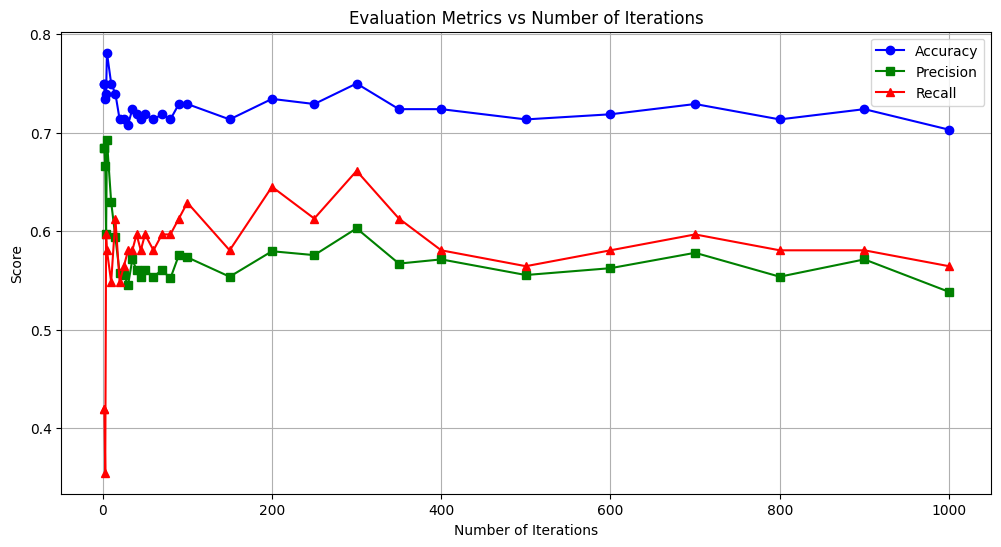

In [33]:
iterations = [r['max_depth'] for r in results]
accuracies = [r['accuracy'] for r in results]
precisions = [r['precision'] for r in results]
recalls = [r['recall'] for r in results]

plt.figure(figsize=(12, 6))
plt.plot(iterations, accuracies, marker='o', label='Accuracy', color='b')
plt.plot(iterations, precisions, marker='s', label='Precision', color='g')
plt.plot(iterations, recalls, marker='^', label='Recall', color='r')
plt.title('Evaluation Metrics vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest**

In [34]:
def calcu3(i):
    model = RandomForestClassifier(n_estimators=i, max_depth=i, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,zero_division=1)
    recall = recall_score(y_test, y_pred)
    
    results.append({
        'hyperparameters': i,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'y_pred': y_pred 
    })

In [35]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
results = []

iter_values = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,60,70,80,90,100,
               150,200,250,300,350,400,500,600,700,800,900,1000]

for j in iter_values:
    calcu3(j)

best_result = max(results, key=lambda x: x['accuracy'])
print("Random Forest:")
print(f"Best result at iteration = {best_result['hyperparameters']}")
print("Accuracy:", best_result['accuracy'])
print("Precision:", best_result['precision'])
print("Recall:", best_result['recall'])
print("Confusion Matrix:\n", confusion_matrix(y_test, best_result['y_pred']))

Random Forest:
Best result at iteration = 70
Accuracy: 0.828125
Precision: 0.7636363636363637
Recall: 0.6774193548387096
Confusion Matrix:
 [[117  13]
 [ 20  42]]


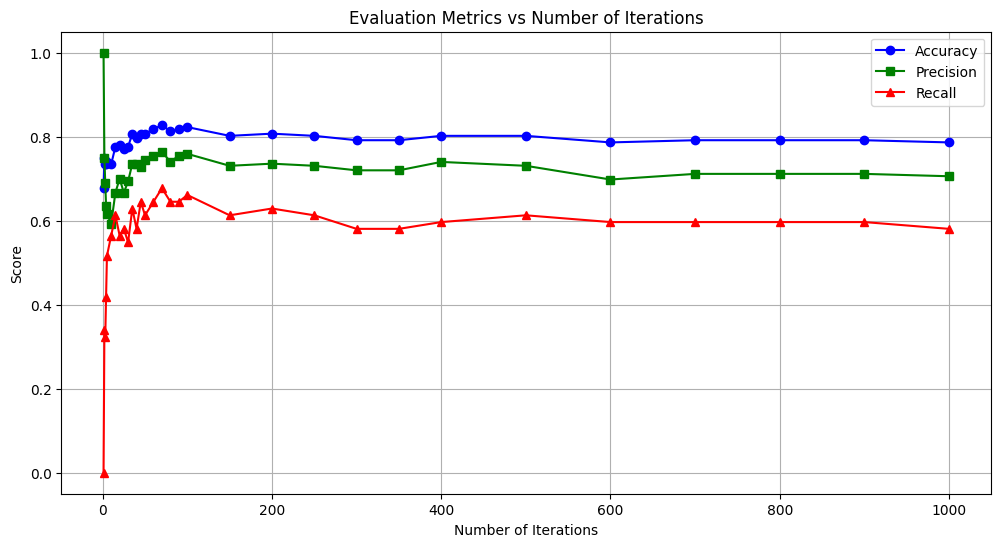

In [36]:
iterations = [r['hyperparameters'] for r in results]
accuracies = [r['accuracy'] for r in results]
precisions = [r['precision'] for r in results]
recalls = [r['recall'] for r in results]

plt.figure(figsize=(12, 6))
plt.plot(iterations, accuracies, marker='o', label='Accuracy', color='b')
plt.plot(iterations, precisions, marker='s', label='Precision', color='g')
plt.plot(iterations, recalls, marker='^', label='Recall', color='r')
plt.title('Evaluation Metrics vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

**XGBoost**

In [37]:
def calcu4(i):
    model = XGBClassifier(n_estimators=i, max_depth = i, random_state=0, learning_rate = 0.15, subsample=0.60)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    
    results.append({
        'hyperparameters': i,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'y_pred': y_pred 
    })

In [38]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
results = []

iter_values = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,60,70,80,90,100,
               150,200,250,300,350,400,500,600,700,800,900,1000]

for j in iter_values:
    calcu4(j)

best_result = max(results, key=lambda x: x['accuracy'])
print("XGBoost:")
print(f"Best result at iteration = {best_result['hyperparameters']}")
print("Accuracy:", best_result['accuracy'])
print("Precision:", best_result['precision'])
print("Recall:", best_result['recall'])
print("Confusion Matrix:\n", confusion_matrix(y_test, best_result['y_pred']))

XGBoost:
Best result at iteration = 40
Accuracy: 0.8385416666666666
Precision: 0.7719298245614035
Recall: 0.7096774193548387
Confusion Matrix:
 [[117  13]
 [ 18  44]]


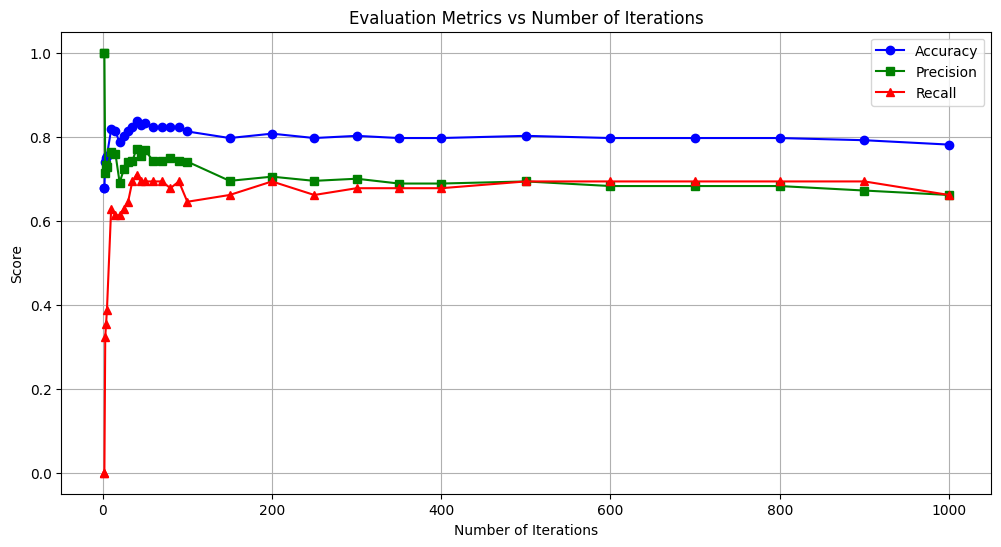

In [39]:
iterations = [r['hyperparameters'] for r in results]
accuracies = [r['accuracy'] for r in results]
precisions = [r['precision'] for r in results]
recalls = [r['recall'] for r in results]

plt.figure(figsize=(12, 6))
plt.plot(iterations, accuracies, marker='o', label='Accuracy', color='b')
plt.plot(iterations, precisions, marker='s', label='Precision', color='g')
plt.plot(iterations, recalls, marker='^', label='Recall', color='r')
plt.title('Evaluation Metrics vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Support Vector Machines

In [40]:
svc = SVC()
svc.fit(X_train,y_train)
ypredict = svc.predict(X_test)
print('Model score with default hyperparameters:\n ')
print("Accuracy:", accuracy_score(y_test, ypredict))
print("Precision:", precision_score(y_test, ypredict))
print("Recall:", recall_score(y_test, ypredict))
print("F1 Score:", f1_score(y_test, ypredict))
print("Confusion Matrix: \n", confusion_matrix(y_test, ypredict))

Model score with default hyperparameters:
 
Accuracy: 0.7760416666666666
Precision: 0.7111111111111111
Recall: 0.5161290322580645
F1 Score: 0.5981308411214953
Confusion Matrix: 
 [[117  13]
 [ 30  32]]


**Using Linear Kernel Method**

In [41]:
linear_svc = SVC(kernel='linear', C=2.0) 
linear_svc.fit(X_train,y_train)
ypredicti = linear_svc.predict(X_test)
print('Model score with Linear SVM method :\n ')
print("Accuracy:", accuracy_score(y_test, ypredicti))
print("Precision:", precision_score(y_test, ypredicti))
print("Recall:", recall_score(y_test, ypredicti))
print("F1 Score:", f1_score(y_test, ypredicti))
print("Confusion Matrix: \n", confusion_matrix(y_test, ypredicti))

Model score with Linear SVM method :
 
Accuracy: 0.8072916666666666
Precision: 0.7551020408163265
Recall: 0.5967741935483871
F1 Score: 0.6666666666666666
Confusion Matrix: 
 [[118  12]
 [ 25  37]]


In [42]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train))) #Checking for Overfitting or Underfitting
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.7639
Test set score: 0.8073


Both are quite Comparable so no problem

**Using Polynomial Kernel Method**

In [43]:
svc = SVC(kernel='poly',C=15,coef0=0.001)
svc.fit(X_train,y_train)
ypredict = svc.predict(X_test)
print('Model score with Polynomial SVM method :\n ')
print("Accuracy:", accuracy_score(y_test, ypredict))
print("Precision:", precision_score(y_test, ypredict))
print("Recall:", recall_score(y_test, ypredict))
print("F1 Score:", f1_score(y_test, ypredict))
print("Confusion Matrix: \n", confusion_matrix(y_test, ypredict))

Model score with Polynomial SVM method :
 
Accuracy: 0.7604166666666666
Precision: 0.6904761904761905
Recall: 0.46774193548387094
F1 Score: 0.5576923076923077
Confusion Matrix: 
 [[117  13]
 [ 33  29]]


In [44]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train))) #Checking for Overfitting or Underfitting
print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.8524
Test set score: 0.7604


Hence we get to know that the Polynomial Kernel method is overfitting the Data.